In [263]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import random
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [235]:
#Read new csv and show
df = pd.read_csv('C:/Users/Elizabeth/Desktop/Gustavo Becerra/TDP/KD.csv')
df.drop('Unnamed: 0', axis= 1, inplace= True) #No needed it 
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.900000,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.200000,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.400000,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.900000,no,no,no,good,no,no,1


In [236]:
#Input features with if-sentence
col_ot = 'pcv'
col_rc = 'rc'
col_wc = 'wc'
col_used = [col_ot, col_rc, col_wc]
col_dep = 'classification' #for predictions
all_cols= (df[col_ot]<= 45.0).all() and (df[col_rc] <= 5.20000).all() and (df[col_wc] <= 7300.0).all()

#n_pcv =(df[col_ot] >= 45.0).all()
if all_cols == True:
   col_dep == 0
else:
   col_dep == 1
#col_ot = n_pcv

   
col_ot1 = [col for col in col_used] #input features

df[col_dep].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [254]:
#train_test_split and x, y declarations
x = df[col_ot1]
y = df[col_dep]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)
print(len(x_train) , len(y_train))

300 300


In [255]:
#Encoder
encoder = LabelEncoder()

for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

df['classification'] = encoder.fit_transform(df['classification'])


In [256]:
#DTC and accuracy_score
acd = tree.DecisionTreeClassifier()

model = acd.fit(x_train, y_train)

y_pred = acd.predict(x_test)
acd_acc = accuracy_score(y_test, y_pred)

print (f"Accuracy_score is:" , acd_acc)

Accuracy_score is: 0.9


In [258]:
# Just for examples
arr_pcv =[]
arr_rc = []
arr_wc = []
for i in range(100):
    arr_pcv.append(random.uniform(0.1,100.0))
    arr_rc.append(random.uniform(0.1,10.0))
    arr_wc.append(random.uniform(0.1,10000.0))
    #print(arr_pcv)
print(len(y_pred), len(arr_pcv), len(arr_wc))

100 100 100


In [259]:
pcv_pred = pd.DataFrame({'PCV generado': arr_pcv, 'RC generado': arr_rc, 'WC generado': arr_wc, 'KND?': y_pred})
pcv_pred

,PCV generado,RC generado,WC generado,KND?
0,88.835911,4.655171,6473.691902,0
1,97.391948,9.179547,7829.111969,1
2,81.582634,0.207679,5480.100654,1
3,39.258147,4.774214,871.707449,0
4,56.389603,2.497735,11.308516,0
...,...,...,...,...
95,16.200418,4.206325,5652.835854,0
96,83.945836,8.672913,2814.605360,0
97,50.150292,6.652645,3743.277108,1
98,52.864541,3.315287,5417.136634,1


[Text(0.5089285714285714, 0.9722222222222222, 'X[0] <= 28.5\ngini = 0.468\nsamples = 300\nvalue = [188, 112]'),
 Text(0.23214285714285715, 0.9166666666666666, 'X[1] <= 26.5\ngini = 0.086\nsamples = 178\nvalue = [170, 8]'),
 Text(0.14285714285714285, 0.8611111111111112, 'X[0] <= 27.5\ngini = 0.046\nsamples = 168\nvalue = [164, 4]'),
 Text(0.07142857142857142, 0.8055555555555556, 'X[0] <= 25.5\ngini = 0.036\nsamples = 163\nvalue = [160, 3]'),
 Text(0.03571428571428571, 0.75, 'gini = 0.0\nsamples = 101\nvalue = [101, 0]'),
 Text(0.10714285714285714, 0.75, 'X[2] <= 41.0\ngini = 0.092\nsamples = 62\nvalue = [59, 3]'),
 Text(0.07142857142857142, 0.6944444444444444, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.14285714285714285, 0.6944444444444444, 'X[2] <= 46.5\ngini = 0.1\nsamples = 57\nvalue = [54, 3]'),
 Text(0.10714285714285714, 0.6388888888888888, 'X[0] <= 26.5\ngini = 0.105\nsamples = 54\nvalue = [51, 3]'),
 Text(0.07142857142857142, 0.5833333333333334, 'gini = 0.107\nsamples = 

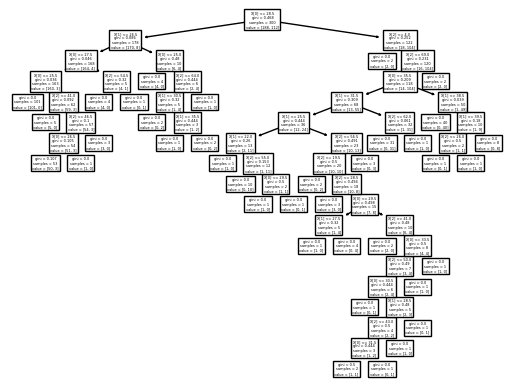

In [260]:
#Visualization of the tree
tree.plot_tree(acd)

Confusion matrix

 [[32  6]
 [ 4 58]]


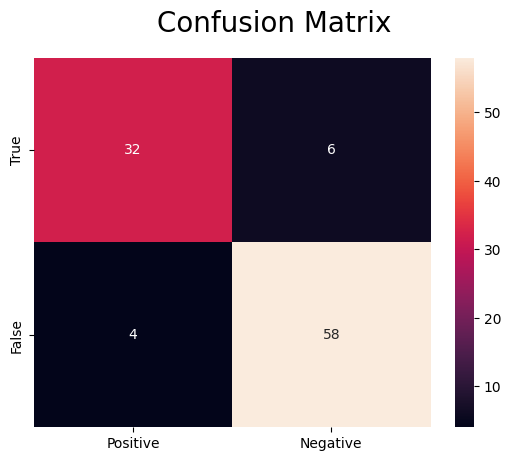

In [261]:
#Matrix Confusion
cm = confusion_matrix( y_test, y_pred, labels=[True, False])
print('Confusion matrix\n\n', cm)
sns.heatmap(cm,annot=True, xticklabels=["Positive", "Negative"], yticklabels=[True, False])
plt.suptitle("Confusion Matrix", fontsize= 20)
plt.savefig('confusion.png')

In [262]:
#classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        62
           1       0.89      0.84      0.86        38

    accuracy                           0.90       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100

